In [1]:
import pandas as pd

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import spearmanr
from pylab import  rcParams
from pandas import Series, DataFrame

In [90]:
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import urllib
from sklearn.neighbors import KNeighborsClassifier
#from matlplotlib import rcParams
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [91]:
 rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
df =pd.read_csv('copy.csv')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail,vmail_message,day_minute,day_call,day_charge,...,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# from previous research in logistic regression model and the importance bart graph in decision tree model, we can select a set of important features as it is required that the knn algorithm have only relenvant input.

In [92]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail', 'vmail_message', 'day_minute',
       'day_call', 'day_charge', 'eve_minute', 'eve_call', 'eve_charge',
       'night_minute', 'night_call', 'night_charge', 'intl_minute',
       'intl_call', 'intl_charge', 'customer_service', 'churn'],
      dtype='object')

In [93]:
cat_vars=['international_plan','voice_mail','day_minute','day_charge','eve_minute','eve_charge','night_charge','intl_call','customer_service']
noncat=[i for i in df.columns if i not in cat_vars]
X =df.drop(noncat,axis=1)
y = df['churn']
X['international_plan'] = pd.get_dummies(X.international_plan)[' yes']
X['voice_mail'] = pd.get_dummies(X.voice_mail)[' yes']
y = pd.get_dummies(y)[' True.']

# scale the input data and add proper weight

In [94]:
X=preprocessing.scale(X)

In [95]:
X2=X.copy()

In [105]:
X=X2.copy()
weight=[1.3 ,1, 1, 2.5, 1, 1, 1, 1.3, 2]
for i in range(size(weight)):
    for j in range(5000):
        X[j,i]=X[j,i]*weight[i]

# train test split and train the model

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [107]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


# print performance

In [108]:
X_expect = y_test
y_pred  = clf.predict(X_test)
print(metrics.classification_report(X_expect,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      2150
          1       0.89      0.56      0.69       350

avg / total       0.93      0.93      0.92      2500



# ten fold cross validation

In [109]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = KNeighborsClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.909


In [110]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

# print prediction distribution and roc curve

Text(0,0.5,'Frequency')

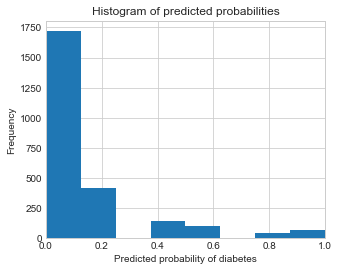

In [111]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

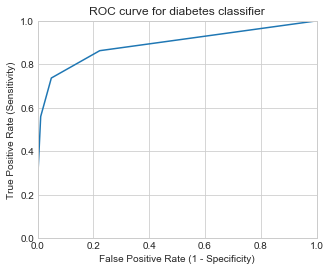

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [113]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8918006644518273


In [114]:

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy on the training subset: 0.934
Accuracy on the test subset: 0.929
